In [2]:
!pip install -q praw
!pip install asyncpraw
!pip install emoji
!pip install emoji --upgrade
!pip install spacymoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.2/553.2 kB 7.6 MB/s eta 0:00:00


In [3]:
import praw #Python Reddit API wrapper
import pandas as pd
from praw.models import MoreComments
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import FreqDist
import datetime as dt
import re # Remove urls
import emoji
import spacy
from spacymoji import Emoji
import en_core_web_sm

In [4]:
reddit = praw.Reddit(
            client_id='Rwr_pdUciDcktVFWc5auFA',
            client_secret='ZVR7fyFVVlTbI5K301X2nqTsasajfg',
            user_agent='Stock-Market')

In [5]:
subreddit = reddit.subreddit('WallStreetBets')
ticker = "NVDA"

def get_date(date):
    return dt.datetime.fromtimestamp(date)

for submission in subreddit.search(ticker, sort='hot',limit=30):
        if submission.domain != "self.wallstreetbets":
            continue
        print(submission.title)
        print('Submission ID =', submission.id, '\n')
        print('date =', get_date(submission.created_utc) , '\n')

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Nvidia $80Put whale surfaces again  33,000 contracts 
Submission ID = 1fq5xbt 

date = 2024-09-26 20:21:22 

Nvidia stock edges up as industry report predicts 'unprecedented levels' of investment in AI data centers
Submission ID = 1fpeiwt 

date = 2024-09-25 20:31:51 

Nvidia stock edges up as industry report predicts 'unprecedented levels' of investment in AI data centers
Submission ID = 1fpgkq8 

date = 2024-09-25 22:01:01 

How Intel Fell From Global Chip Champion to Takeover Target
Strategic missteps and an unexpected AI boom have weakened Intel.
Submission ID = 1fn13lx 

date = 2024-09-22 19:15:36 

NVIDIA (NVDA) CEO Jensen Huang Points to $1 Trillion Opportunity for the Company
Submission ID = 1fijepf 

date = 2024-09-16 23:25:32 



In [6]:
# define a submission object
Post1 = reddit.submission(id='oldtp9')

In [7]:
# store all comments scraped from submission object in a list
Comments_All = []
stock = "NVDA"
Post1.comments.replace_more(limit=None)
for comments in Post1.comments.list():
    if any(keyword in comments.body for keyword in stock):
        Comments_All.append(comments.body)

print(Comments_All, '\n')
print('Total Comments Scraped = ', (len(Comments_All)))

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

['AAPL? Alright this thread has lost it', 'GME GOING TO THE OUTER BANKS OF THE STRATOSPHERE!! (allright its up +4.15%)', 'Poor AAPL, forced to spend the day on the short bus with the special kids again', 'AMC and GME having a field day', 'Looks like GME and AMC are the first from the graveyard to go green', 'Any green don’t matter until 9', 'AMC drop looks as natural as a Kardashian bone structure', 'It makes sense for AMC to gain on a Friday.  On Monday they will release their weekend box office numbers, and of course they will break all records for a the past 2 years...to get another great gain on Monday.', 'GME is in the popular ticket thread FTDs are coming out of SHFs asses, it’s Friday. Let’s get popping!', 'Cue bots posting "CLOV" 100 times with 15 awards and 25 upvotes', 'GME and AMC all the way baby!!', 'Love my AAPL a day!!', "Yes, AMC!!  Let's go for real this time!", 'AMC do that thing I like..', 'Get Apple off this thread. I guess I should sell my calls at open. Fuck you m

In [8]:
# convert to a string object
List1 = Comments_All
List1 = [str(i) for i in List1]
string_raw = ' , '.join(List1)
string_raw

'AAPL? Alright this thread has lost it , GME GOING TO THE OUTER BANKS OF THE STRATOSPHERE!! (allright its up +4.15%) , Poor AAPL, forced to spend the day on the short bus with the special kids again , AMC and GME having a field day , Looks like GME and AMC are the first from the graveyard to go green , Any green don’t matter until 9 , AMC drop looks as natural as a Kardashian bone structure , It makes sense for AMC to gain on a Friday.  On Monday they will release their weekend box office numbers, and of course they will break all records for a the past 2 years...to get another great gain on Monday. , GME is in the popular ticket thread FTDs are coming out of SHFs asses, it’s Friday. Let’s get popping! , Cue bots posting "CLOV" 100 times with 15 awards and 25 upvotes , GME and AMC all the way baby!! , Love my AAPL a day!! , Yes, AMC!!  Let\'s go for real this time! , AMC do that thing I like.. , Get Apple off this thread. I guess I should sell my calls at open. Fuck you mods. You guys 

In [9]:
# convert emojis to text
# Function for converting emojis into word
emoji_converted_text = emoji.demojize(string_raw)
emoji_converted_text

'AAPL? Alright this thread has lost it , GME GOING TO THE OUTER BANKS OF THE STRATOSPHERE!! (allright its up +4.15%) , Poor AAPL, forced to spend the day on the short bus with the special kids again , AMC and GME having a field day , Looks like GME and AMC are the first from the graveyard to go green , Any green don’t matter until 9 , AMC drop looks as natural as a Kardashian bone structure , It makes sense for AMC to gain on a Friday.  On Monday they will release their weekend box office numbers, and of course they will break all records for a the past 2 years...to get another great gain on Monday. , GME is in the popular ticket thread FTDs are coming out of SHFs asses, it’s Friday. Let’s get popping! , Cue bots posting "CLOV" 100 times with 15 awards and 25 upvotes , GME and AMC all the way baby!! , Love my AAPL a day!! , Yes, AMC!!  Let\'s go for real this time! , AMC do that thing I like.. , Get Apple off this thread. I guess I should sell my calls at open. Fuck you mods. You guys 

In [10]:
# tokenize and clean strings
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|http\S+')
tokenized_string = tokenizer.tokenize(emoji_converted_text)
tokenized_string

['AAPL',
 'Alright',
 'this',
 'thread',
 'has',
 'lost',
 'it',
 'GME',
 'GOING',
 'TO',
 'THE',
 'OUTER',
 'BANKS',
 'OF',
 'THE',
 'STRATOSPHERE',
 'allright',
 'its',
 'up',
 '4',
 '15',
 'Poor',
 'AAPL',
 'forced',
 'to',
 'spend',
 'the',
 'day',
 'on',
 'the',
 'short',
 'bus',
 'with',
 'the',
 'special',
 'kids',
 'again',
 'AMC',
 'and',
 'GME',
 'having',
 'a',
 'field',
 'day',
 'Looks',
 'like',
 'GME',
 'and',
 'AMC',
 'are',
 'the',
 'first',
 'from',
 'the',
 'graveyard',
 'to',
 'go',
 'green',
 'Any',
 'green',
 'don',
 't',
 'matter',
 'until',
 '9',
 'AMC',
 'drop',
 'looks',
 'as',
 'natural',
 'as',
 'a',
 'Kardashian',
 'bone',
 'structure',
 'It',
 'makes',
 'sense',
 'for',
 'AMC',
 'to',
 'gain',
 'on',
 'a',
 'Friday',
 'On',
 'Monday',
 'they',
 'will',
 'release',
 'their',
 'weekend',
 'box',
 'office',
 'numbers',
 'and',
 'of',
 'course',
 'they',
 'will',
 'break',
 'all',
 'records',
 'for',
 'a',
 'the',
 'past',
 '2',
 'years',
 'to',
 'get',
 'anoth

In [11]:
# convert Tokens into lowercase letters
lc_tokenized_string = [word.lower() for word in tokenized_string]
lc_tokenized_string

['aapl',
 'alright',
 'this',
 'thread',
 'has',
 'lost',
 'it',
 'gme',
 'going',
 'to',
 'the',
 'outer',
 'banks',
 'of',
 'the',
 'stratosphere',
 'allright',
 'its',
 'up',
 '4',
 '15',
 'poor',
 'aapl',
 'forced',
 'to',
 'spend',
 'the',
 'day',
 'on',
 'the',
 'short',
 'bus',
 'with',
 'the',
 'special',
 'kids',
 'again',
 'amc',
 'and',
 'gme',
 'having',
 'a',
 'field',
 'day',
 'looks',
 'like',
 'gme',
 'and',
 'amc',
 'are',
 'the',
 'first',
 'from',
 'the',
 'graveyard',
 'to',
 'go',
 'green',
 'any',
 'green',
 'don',
 't',
 'matter',
 'until',
 '9',
 'amc',
 'drop',
 'looks',
 'as',
 'natural',
 'as',
 'a',
 'kardashian',
 'bone',
 'structure',
 'it',
 'makes',
 'sense',
 'for',
 'amc',
 'to',
 'gain',
 'on',
 'a',
 'friday',
 'on',
 'monday',
 'they',
 'will',
 'release',
 'their',
 'weekend',
 'box',
 'office',
 'numbers',
 'and',
 'of',
 'course',
 'they',
 'will',
 'break',
 'all',
 'records',
 'for',
 'a',
 'the',
 'past',
 '2',
 'years',
 'to',
 'get',
 'anoth

In [12]:
# remove stopwords *** stopwords are words that do not add much information to a sentence
spacy_nlp = en_core_web_sm.load()
all_sw = spacy_nlp.Defaults.stop_words
text = lc_tokenized_string
tokens_wosm = [word for word in text if not word in all_sw]

tokens_wosm

['aapl',
 'alright',
 'thread',
 'lost',
 'gme',
 'going',
 'outer',
 'banks',
 'stratosphere',
 'allright',
 '4',
 '15',
 'poor',
 'aapl',
 'forced',
 'spend',
 'day',
 'short',
 'bus',
 'special',
 'kids',
 'amc',
 'gme',
 'having',
 'field',
 'day',
 'looks',
 'like',
 'gme',
 'amc',
 'graveyard',
 'green',
 'green',
 'don',
 't',
 'matter',
 '9',
 'amc',
 'drop',
 'looks',
 'natural',
 'kardashian',
 'bone',
 'structure',
 'makes',
 'sense',
 'amc',
 'gain',
 'friday',
 'monday',
 'release',
 'weekend',
 'box',
 'office',
 'numbers',
 'course',
 'break',
 'records',
 'past',
 '2',
 'years',
 'great',
 'gain',
 'monday',
 'gme',
 'popular',
 'ticket',
 'thread',
 'ftds',
 'coming',
 'shfs',
 'asses',
 's',
 'friday',
 'let',
 's',
 'popping',
 'cue',
 'bots',
 'posting',
 'clov',
 '100',
 'times',
 '15',
 'awards',
 '25',
 'upvotes',
 'gme',
 'amc',
 'way',
 'baby',
 'love',
 'aapl',
 'day',
 'yes',
 'amc',
 'let',
 's',
 'real',
 'time',
 'amc',
 'thing',
 'like',
 'apple',
 'threa

In [13]:
cleaned_comments = tokens_wosm

In [14]:
print("Original length of words = ", (len(string_raw)))
print("Number of words after converting emojis into text= ", (len(emoji_converted_text)))
print("Number of words after removing tokenizing and cleaning = ", (len(tokenized_string)))
print("Number of words after removing stop words = ", (len(tokens_wosm)))

Original length of words =  30668
Number of words after converting emojis into text=  32019
Number of words after removing tokenizing and cleaning =  6007
Number of words after removing stop words =  3119


In [16]:
import pickle
with open('NVDA.pkl', 'wb') as fp:
    pickle.dump(cleaned_comments, fp)

In [17]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import FreqDist
import custom_lexicon
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [19]:
# Import the NVDA data
cleaned_comments = pd.read_pickle("NVDA.pkl")
cleaned_comments

['aapl',
 'alright',
 'thread',
 'lost',
 'gme',
 'going',
 'outer',
 'banks',
 'stratosphere',
 'allright',
 '4',
 '15',
 'poor',
 'aapl',
 'forced',
 'spend',
 'day',
 'short',
 'bus',
 'special',
 'kids',
 'amc',
 'gme',
 'having',
 'field',
 'day',
 'looks',
 'like',
 'gme',
 'amc',
 'graveyard',
 'green',
 'green',
 'don',
 't',
 'matter',
 '9',
 'amc',
 'drop',
 'looks',
 'natural',
 'kardashian',
 'bone',
 'structure',
 'makes',
 'sense',
 'amc',
 'gain',
 'friday',
 'monday',
 'release',
 'weekend',
 'box',
 'office',
 'numbers',
 'course',
 'break',
 'records',
 'past',
 '2',
 'years',
 'great',
 'gain',
 'monday',
 'gme',
 'popular',
 'ticket',
 'thread',
 'ftds',
 'coming',
 'shfs',
 'asses',
 's',
 'friday',
 'let',
 's',
 'popping',
 'cue',
 'bots',
 'posting',
 'clov',
 '100',
 'times',
 '15',
 'awards',
 '25',
 'upvotes',
 'gme',
 'amc',
 'way',
 'baby',
 'love',
 'aapl',
 'day',
 'yes',
 'amc',
 'let',
 's',
 'real',
 'time',
 'amc',
 'thing',
 'like',
 'apple',
 'threa

In [20]:
# Initialise vader sentiment analyser
new_words = custom_lexicon.wsbfinancial_jargon
SIA = SentimentIntensityAnalyzer()
SIA.lexicon.update(new_words)

In [21]:
# Polarity Score of Words
results = []

for comments in cleaned_comments:
        pol_score = SIA.polarity_scores(comments)
        pol_score['words'] = comments
        results.append(pol_score)

df = pd.DataFrame.from_records(results)
df.head(100)

,neg,neu,pos,compound,words
0,0.0,1.0,0.0,0.0000,aapl
1,0.0,0.0,1.0,0.2500,alright
2,0.0,1.0,0.0,0.0000,thread
3,1.0,0.0,0.0,-0.3182,lost
4,0.0,1.0,0.0,0.0000,gme
...,...,...,...,...,...
95,0.0,1.0,0.0,0.0000,amc
96,0.0,1.0,0.0,0.0000,let
97,0.0,0.0,0.0,0.0000,s
98,0.0,1.0,0.0,0.0000,real


In [22]:
# Create a new column
# Categorize them into positive, negative and neutral words based on its compound score
# Print "sentiment label" for each word
df['sent_label'] = 0
df.loc[df['compound'] >= 0.05, 'sent_label'] = 1
df.loc[df['compound'] <= -0.05, 'sent_label'] = -1
df
print(df.sent_label.value_counts())
print(df.sent_label.value_counts(normalize=True) * 100)

sent_label
 0    2469
 1     387
-1     263
Name: count, dtype: int64
sent_label
 0    79.159987
 1    12.407823
-1     8.432190
Name: proportion, dtype: float64


<ipython-input-23-30c8b6ffc868>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])


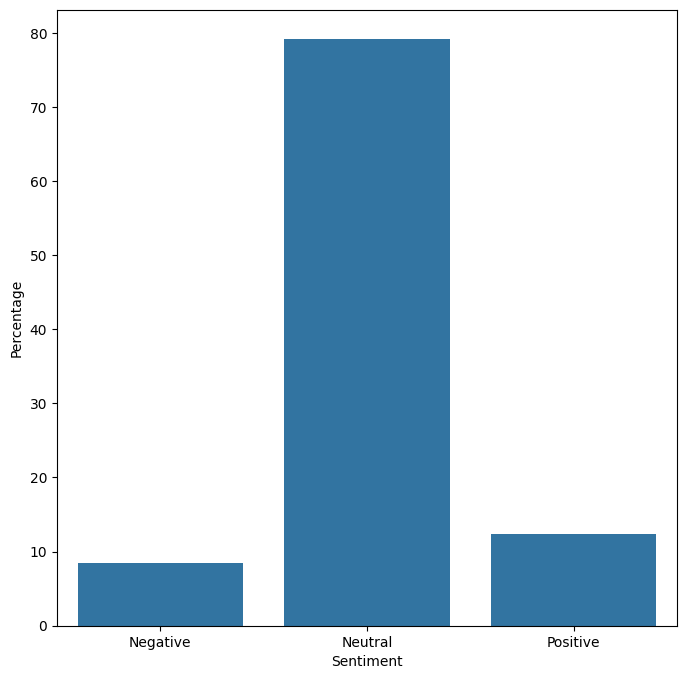

In [23]:
# create a bar chart
fig, ax = plt.subplots(figsize=(8,8))
counts = df.sent_label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_xlabel("Sentiment")
ax.set_ylabel("Percentage")

plt.show()

In [24]:
# Most common positive words vs. negative words
positive_comments = list(df.loc[df['sent_label'] == 1].words)
pcomments_frequency = FreqDist(positive_comments)
pos_freq = pcomments_frequency.most_common(20)

negative_comments = list(df.loc[df['sent_label'] == -1].words)
ncomments_frequency = FreqDist(negative_comments)
neg_freq = ncomments_frequency.most_common(20)

print("The 20 most common positive words that were used in these comments are :",pos_freq )
print()
print("The 20 most common negative words that were used in these comments are :",neg_freq )

The 20 most common positive words that were used in these comments are : [('rocket', 30), ('like', 26), ('buy', 16), ('want', 15), ('squeeze', 10), ('gem_stone', 10), ('holding', 9), ('good', 9), ('shares', 9), ('play', 7), ('calls', 6), ('buying', 6), ('hold', 6), ('pump', 6), ('gain', 5), ('yes', 5), ('better', 5), ('sure', 5), ('lol', 5), ('popular', 4)]

The 20 most common negative words that were used in these comments are : [('shit', 17), ('fire', 16), ('sell', 12), ('lose', 9), ('short', 7), ('bad', 7), ('lost', 5), ('puts', 5), ('loss', 5), ('dump', 5), ('shorts', 5), ('crazy', 5), ('fuck', 4), ('drop', 3), ('stop', 3), ('sick', 3), ('risk', 3), ('damn', 3), ('wtf', 3), ('trap', 3)]


In [25]:
import plotly.graph_objs as go
import yfinance as yf
import numpy as np

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [26]:
ticker = 'NVDA'  # Replace with your desired ticker
data = yf.download(ticker, period='1mo')
print(data)


[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-08-28  128.119995  128.330002  122.639999  125.610001  125.599258   
2024-08-29  121.360001  124.430000  116.709999  117.589996  117.579941   
2024-08-30  119.529999  121.750000  117.220001  119.370003  119.359795   
2024-09-03  116.010002  116.209999  107.290001  108.000000  107.990761   
2024-09-04  105.410004  113.269997  104.120003  106.209999  106.200912   
2024-09-05  104.989998  109.650002  104.760002  107.209999  107.200829   
2024-09-06  108.040001  108.150002  100.949997  102.830002  102.821205   
2024-09-09  104.879997  106.550003  103.690002  106.470001  106.460892   
2024-09-10  107.809998  109.400002  104.949997  108.099998  108.090752   
2024-09-11  109.389999  117.190002  107.419998  116.910004  116.900002   
2024-09-12  116.839996  120.790001  115.379997  119.139999  119.139999   
2024-09-13  119.080002  119.959999  11

Stock symbol: NVDA


[*********************100%***********************]  1 of 1 completed
<ipython-input-30-5c74ae966d51>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
<ipython-input-30-5c74ae966d51>:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
<ipython-input-30-5c74ae966d51>:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  buy_pri

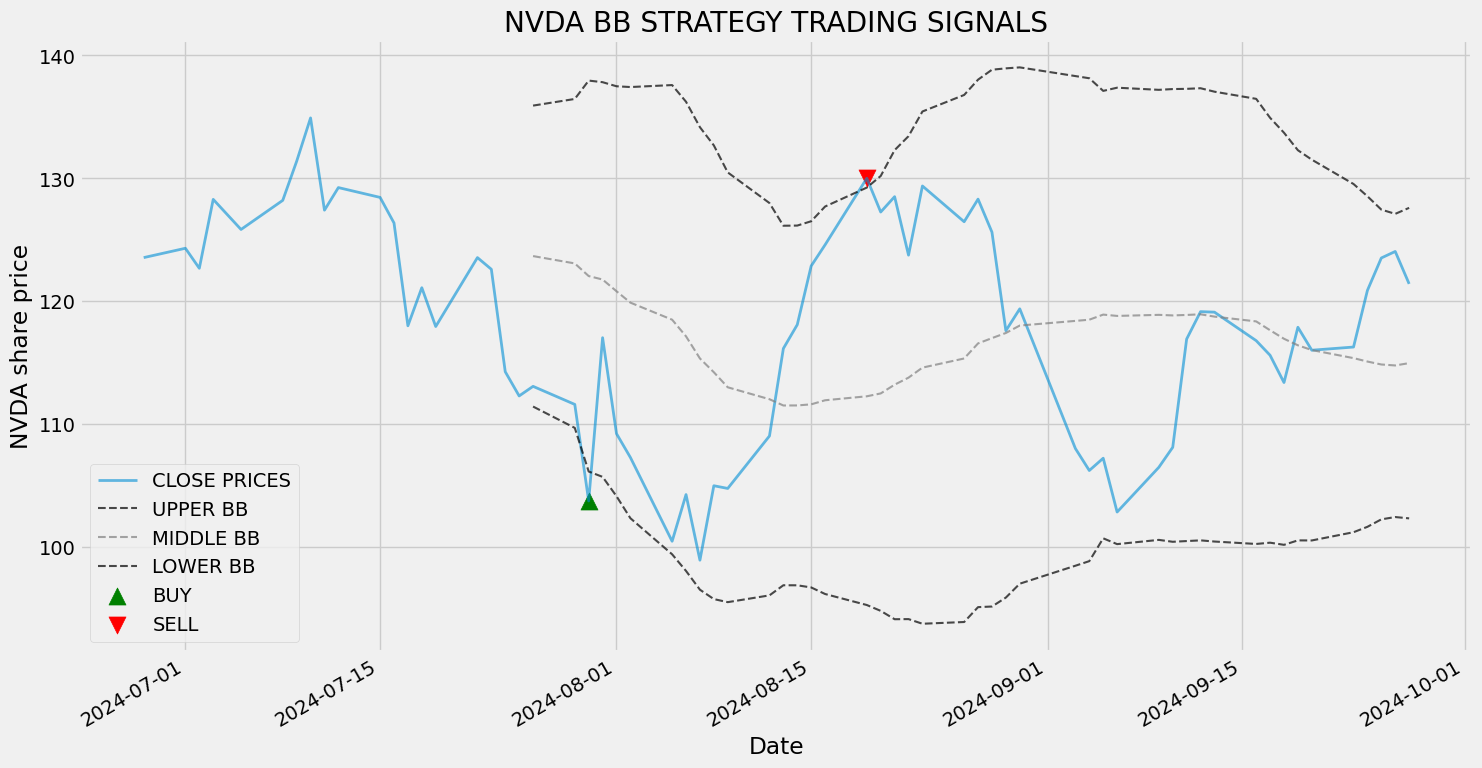

In [30]:
# Take user input for stock symbol
choice = input("Stock symbol: ")
choice = choice.upper()

# Download stock data using yfinance (using 3 months of data instead of 1 month)
stock_data = yf.download(tickers=choice, period='3mo', interval='1d', rounding=True)

# Function to calculate Simple Moving Average (SMA)
def sma(data, window):
    return data.rolling(window=window).mean()

# Bollinger Bands calculation function
def bb(data, sma, window):
    std = data.rolling(window=window).std()
    upper_bb = sma + (std * 2)
    lower_bb = sma - (std * 2)
    return upper_bb, lower_bb

# Calculate 20-day SMA and Bollinger Bands
stock_data['sma_20'] = sma(stock_data['Close'], 20)
stock_data['upper_bb'], stock_data['lower_bb'] = bb(stock_data['Close'], stock_data['sma_20'], 20)

# Function to implement Bollinger Bands trading strategy
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0

    for i in range(1, len(data)):  # Start from index 1 to avoid referencing -1
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)

    # Prepend NaN to maintain the same length as original data
    buy_price.insert(0, np.nan)
    sell_price.insert(0, np.nan)
    bb_signal.insert(0, 0)

    return buy_price, sell_price, bb_signal

# Get the buy/sell signals
buy_price, sell_price, bb_signal = implement_bb_strategy(stock_data['Close'], stock_data['lower_bb'], stock_data['upper_bb'])

# Plot the Bollinger Bands values with buy and sell signals
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [16, 9]

# Plotting close prices and Bollinger Bands
stock_data['Close'].plot(label='CLOSE PRICES', alpha=0.6, linewidth=2)
stock_data['upper_bb'].plot(label='UPPER BB', linestyle='--', linewidth=1.5, color='black', alpha=0.7)
stock_data['sma_20'].plot(label='MIDDLE BB', linestyle='--', linewidth=1.5, color='grey', alpha=0.7)
stock_data['lower_bb'].plot(label='LOWER BB', linestyle='--', linewidth=1.5, color='black', alpha=0.7)

# Plotting buy and sell signals with adjusted marker sizes and colors
plt.scatter(stock_data.index, buy_price, marker='^', color='green', label='BUY', s=150)
plt.scatter(stock_data.index, sell_price, marker='v', color='red', label='SELL', s=150)

# Adding labels and legend
plt.title(f'{choice} BB STRATEGY TRADING SIGNALS')
plt.ylabel(f'{choice} share price')
plt.grid(True)  # Enable grid
plt.legend()
plt.show()


In [31]:
# Print the most recent stock data
stock_data1 = yf.download(tickers=choice, period = '1mo', interval = '1d', rounding= True)
def sma(data, window):
    sma = data.rolling(window = window).mean()
    return sma

stock_data1['sma_20'] = sma(stock_data1['Close'], 20)

def bb(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

stock_data1['upper_bb'], stock_data1['lower_bb'] = bb(stock_data1['Close'], stock_data1['sma_20'], 20)

print("Today's", "$",choice, "Data :" )
stock_data1.tail(1)

[*********************100%***********************]  1 of 1 completed

Today's $ NVDA Data :


,Open,High,Low,Close,Adj Close,Volume,sma_20,upper_bb,lower_bb
Date,,,,,,,,,
2024-09-27,123.97,124.03,119.26,121.4,121.4,270161000,114.9515,127.589222,102.313778
